# pokemon data!

In [3]:
%run ./apiMethods.ipynb

myFunc()

abc


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid')


In [27]:
pokemonTable = pd.read_csv('Data/Pokemon.csv')

pokemonTypeCombinedScores = pd.read_csv('Data/PokeTypeCombinedScores.csv')
pokemonTypeChart = pd.read_csv('Data/PokemonTypeChart.csv')
pokemonTypeStats = pd.read_csv('Data/PokemonTypeStats.csv')
pokemonTypeScore = pd.read_csv('Data/PokemonTypeScore.csv')

In [71]:
pokemonTable.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [79]:
pokemonTable['Type 1']

800

In [28]:
pokemonTypeCombinedScores.head()

Unnamed: 0  Attack Score  Defense Score  Overall Score
0      Normal-Fire            19             15             34
1     Normal-Water            21             16             37
2  Normal-Electric            20             18             38
3     Normal-Grass            18              7             25
4       Normal-Ice            19              8             27

In [29]:
pokemonTypeChart.head()

Unnamed: 0  Normal  Fire  Water  Electric  Grass  Ice  Fighting  Poison  \
0     Normal     1.0   1.0    1.0       1.0    1.0  1.0       1.0     1.0   
1       Fire     1.0   0.5    0.5       1.0    2.0  2.0       1.0     1.0   
2      Water     1.0   2.0    0.5       1.0    0.5  1.0       1.0     1.0   
3   Electric     1.0   1.0    2.0       0.5    0.5  1.0       1.0     1.0   
4      Grass     1.0   0.5    2.0       1.0    0.5  1.0       1.0     0.5   

   Ground  Flying  Psychic  Bug  Rock  Ghost  Dragon  Dark  Steel  Fairy  
0     1.0     1.0      1.0  1.0   0.5    0.0     1.0   1.0    0.5    1.0  
1     1.0     1.0      1.0  2.0   0.5    1.0     0.5   1.0    2.0    1.0  
2     2.0     1.0      1.0  1.0   2.0    1.0     0.5   1.0    1.0    1.0  
3     0.0     2.0      1.0  1.0   1.0    1.0     0.5   1.0    1.0    1.0  
4     2.0     0.5      1.0  0.5   2.0    1.0     0.5   1.0    0.5    1.0

In [129]:
pokemonTable.attr

AttributeError: 'DataFrame' object has no attribute 'rows'

In [30]:
pokemonTypeStats.head()

Unnamed: 0  Super Effective Against  Strong Defense Against  Immune To  \
0     Normal                        0                       0          1   
1       Fire                        4                       6          0   
2      Water                        3                       4          0   
3   Electric                        2                       3          0   
4      Grass                        3                       4          0   

   No effect Against  Not very Effective Against  Weak Defence Against  \
0                  1                           2                     1   
1                  0                           4                     3   
2                  0                           3                     2   
3                  1                           3                     1   
4                  0                           7                     5   

   Normal Offense  Normal Defense  
0              15              16  
1              10               9  
2              12              12  
3              12              14  
4               8               9

In [31]:
pokemonTypeScore.head()

Unnamed: 0  Attack Score  Defense Score  Overall Score
0     Normal             7             18             25
1       Fire            10             15             25
2      Water            12             16             28
3   Electric             6             18             24
4      Grass             0              7              7

In [55]:
pokemonTypeScore.columns = ['type','atk','dfn','ovrl']

In [51]:
pokemonTypeScore.columns

Index(['type', 'as', 'ds', 'os'], dtype='object')

In [56]:
pokemonTypeScore.atk

0      7
1     10
2     12
3      6
4      0
5     10
6      3
7      3
8     12
9     12
10     9
11     0
12    13
13    12
14    11
15    11
16     9
17    12
Name: atk, dtype: int64

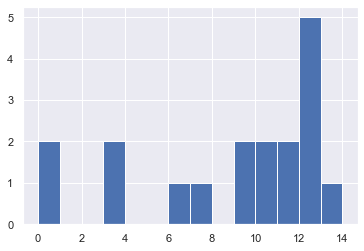

In [61]:
bin_sizes, _, _ = plt.hist(pokemonTypeScore.atk, bins=range(0, 15))

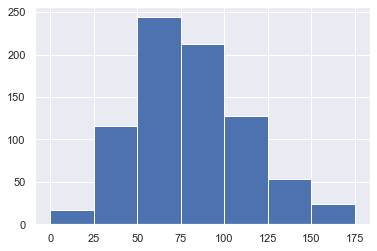

In [72]:
pokemonAtkValues, _, _ = plt.hist(pokemonTable['Attack'], bins=range(0, 200, 25))

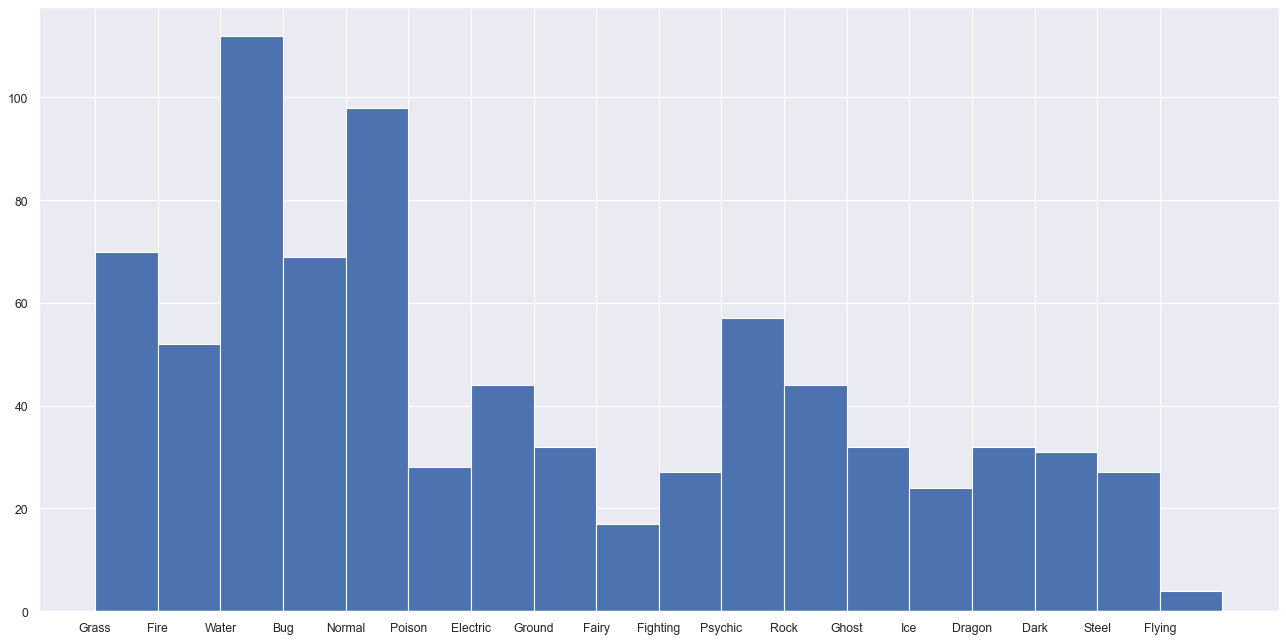

In [100]:
from matplotlib.pyplot import figure

typeOnes = list(dict.fromkeys(pokemonTable['Type 1']))

figure(figsize=(20, 10), dpi=80)

pokemonAtkValues, _, _ = plt.hist(pokemonTable['Type 1'], list(range(0, len(typeOnes)+1)))

In [96]:
list(dict.fromkeys(pokemonTable['Type 1']))

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [197]:
import requests
import json
response = requests.get('https://pokeapi.co/api/v2/')
response = json.loads(response.text)
response['ability']


def makeRequest(params, fullString):
    if(fullString):
        url = params
    else:
        url = f"https://pokeapi.co/api/v2/{params}"
    print(url)
    response = requests.get(url)
    response = json.loads(response.text)
    return response


In [ ]:
# ARENA 1 EXAMPLE

In [205]:
# ARENA 1 EXAMPLE
locations = ['kanto-route-1', 'kanto-route-2', 'viridian-forest']
locations
areas = []
for location in locations:
    areaUrl = makeRequest(f'location/{location}', False)['areas'][0]['url']
    area = makeRequest(areaUrl, True)
    areas.append(area)

https://pokeapi.co/api/v2/location/kanto-route-1
https://pokeapi.co/api/v2/location-area/295/
https://pokeapi.co/api/v2/location/kanto-route-2
https://pokeapi.co/api/v2/location-area/296/
https://pokeapi.co/api/v2/location/viridian-forest
https://pokeapi.co/api/v2/location-area/321/


KeyError: 'pokemon-encounters'

In [210]:
for encounter in areas[0]['pokemon_encounters']:
    print(encounter['pokemon']['name'])

pidgey
rattata
raticate
sentret
furret
hoothoot
poochyena
plusle
minun
shinx
